# Part II - FordGoBike Trip Analysis

## by Yusuff Adebayo

## Investigation Overview

>In this exploratory analysis, my project is based on exploring those features, of the FordGoBike trips dataset, that would be a good determinant of the trips duration as well as predicting whether a trip would be shared or not. The main features of focus are: age, duration, user_type, days of the week and member_gender.

## Dataset Overview

> The FordGoBike dataset contains 183,412 observations with 16 variables which include: Ride duration (Secs), Start and end time, Start and end station id and Name, Start and end station Latitutude and Longitude, Bike Id, User type, Member birth year, Member gender, Bike share for all trip (Yes or No). This variables contain information about individual rides in a bike-sharing system. 

In [31]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [32]:
# load in the dataset into a pandas dataframe
ride = pd.read_csv('201902-fordgobike-tripdata.csv')

In [33]:
# investigate null entries and replace the null values with the modal values
null_features = ride.isna().sum().sort_values().index[-6:]
for na in null_features:
    ride[na].fillna(ride[na].mode()[0], inplace=True)

In [34]:
# change the wrong datatypes to the correct ones
wrongDtype = ['start_time', 'end_time','start_station_id','start_station_latitude','start_station_longitude', 
              'end_station_id','end_station_latitude','end_station_longitude', 'bike_id', 'member_birth_year']

for col in wrongDtype:
    if 'time' in col:
        ride[col] = pd.to_datetime(ride[col])
    elif 'id' in col:
        ride[col] = ride[col].astype(str)
    elif 'tude' in col:
        ride[col] = ride[col].astype(str)
    else:
        ride[col] = ride[col].astype(int)


In [35]:
# create age column for each of the riders
currentyr = pd.datetime.now().year
birthyr = ride['member_birth_year']

ride['age'] = currentyr - birthyr

# create ride minutes from duration_sec column
ride['duration_min'] = (ride['duration_sec'] / 60).astype(int)

# create the ride's weekday from start time
ride['day_of_the_week'] = ride['start_time'].dt.day_name()

## Distribution of ride's duration and rider's age

Most of the riders prefer short term trip (from 0 minutes to 2 hours) and most of these riders are also youths i.e people between age 20 to 50 years. Also, those that ride more than 3 hours are youth of age 38 or thereabout. 

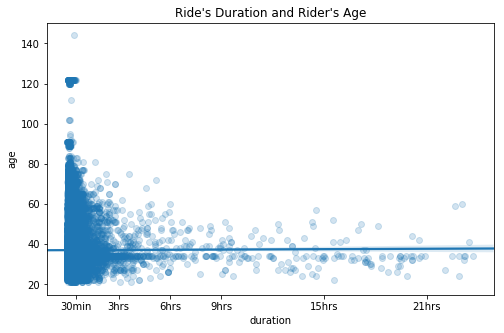

In [36]:
# the relationship between the two variables: age and duration.
plt.figure(figsize=[8,5])
sns.regplot(data=ride, x='duration_min', y='age', scatter_kws={'alpha':0.2}, x_jitter=0.1)
plt.title("Ride's Duration and Rider's Age")
plt.xticks([30, 180, 360, 540, 900, 1260], ['30min', '3hrs', '6hrs', '9hrs', '15hrs', '21hrs'])
plt.xlabel('duration');

## Distribution of bike sharing and other important features such as user type and gender
91% of users do not share their bike, and there are more subscribers than customers just as there are more male users than their female counterparts. Only few other gender users exist.

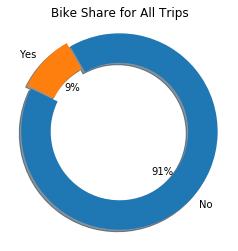

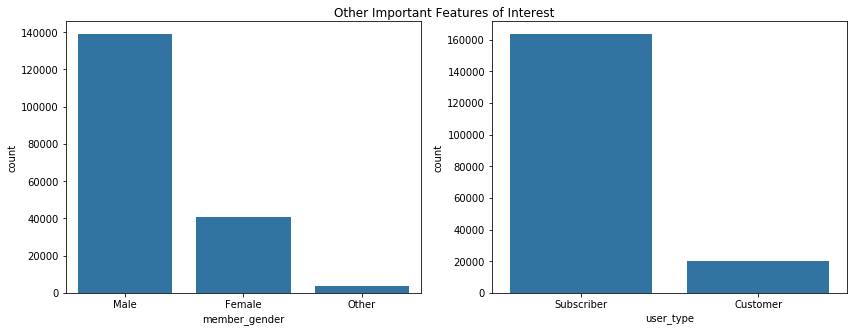

In [37]:
# checking the distribution of other important features of interest
nomFeat = ['member_gender','user_type']
default_color = sns.color_palette()[0]
bshare = ride.bike_share_for_all_trip.value_counts()
expl = [0,0.05]

# plot a pie chart of trip share status
plt.pie(bshare, labels = bshare.index, startangle = 120, explode = expl,
        counterclock = False, autopct='%1.0f%%', shadow=True, wedgeprops = {'width' : 0.3})
plt.axis('square')
plt.title('Bike Share for All Trips', loc='center');

# plot bar graph for both member gender and user type
fig, ax = plt.subplots(ncols=2, figsize = [14,5])
for feat in nomFeat:
    sns.countplot(data = ride, x = feat , color = default_color, ax = ax[nomFeat.index(feat)],
                  order = ride[feat].value_counts().index)
plt.suptitle('Other Important Features of Interest', y=0.92);


## Daily ride distribution
There are generally more trips during the weekdays than the weekends.

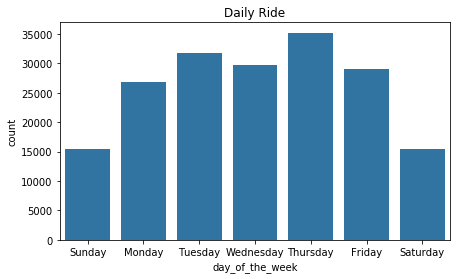

In [38]:
# rides by days of the week
wkdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
wkdaysCat = pd.api.types.CategoricalDtype(categories=wkdays, ordered=True)
ride['day_of_the_week']=ride['day_of_the_week'].astype(wkdaysCat)

plt.figure(figsize = [7, 4])
sns.countplot(data = ride, x = 'day_of_the_week' , color = default_color)
plt.title('Daily Ride');

## Days of the week and their average trip duration
Interestingly, while there are more volumes of trips on weekdays, people actually spend more time on a ride during the weekends.  Also, the median riding duration for eacn day of the week happens to be less than 10 minutes for both weekends and weekdays.

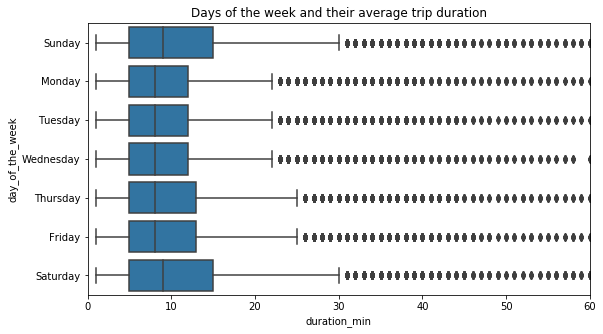

In [39]:
# reducing the trip duration to 60 minutes since majority of the ride falls within this range
plt.figure(figsize = [9, 5])
sns.boxplot(ride.duration_min,ride.day_of_the_week, color = default_color)
plt.xlim([0,60])
plt.title('Days of the week and their average trip duration');

## The relationship between average daily trip duration and other important features (gender and user type)
Other gender happens to spend more time daily on trips followed by the female gender, while the male gender spend the least time on trips. Similarly, while the subscribers are spending around 10 minutes on average on their daily trip, customers are spending around 17 to 30 minutes daily.

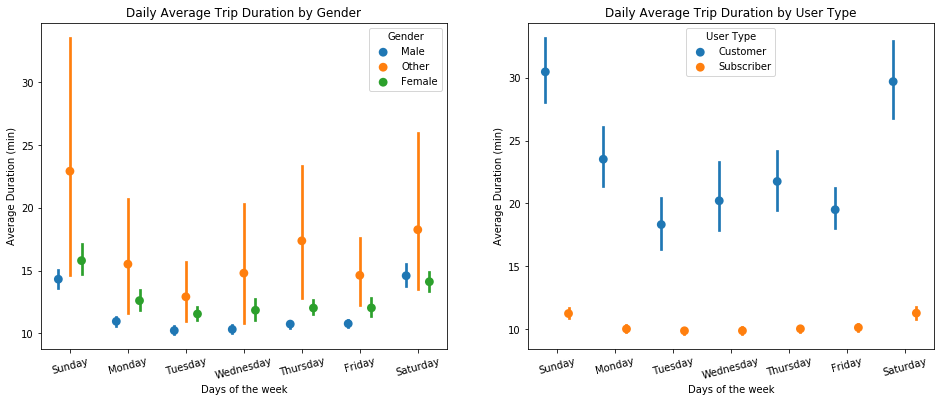

In [40]:
# creating a function for the visualization labels
def pltlabel(x,y,title):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

# the relationship between average duration of trip by day and other interesting features
plt.figure(figsize = [16, 6])

plt.subplot(1, 2, 1)
sns.pointplot(data = ride, x = 'day_of_the_week', y = 'duration_min', hue = 'member_gender', linestyles = '', dodge = 0.4)
plt.xticks(rotation = 15)
pltlabel('Days of the week','Average Duration (min)','Daily Average Trip Duration by Gender')
plt.legend(title= 'Gender', loc=0);

plt.subplot(1, 2, 2)
sns.pointplot(data = ride, x = 'day_of_the_week', y = 'duration_min', hue = 'user_type', linestyles = '', dodge = 0.4)
plt.xticks(rotation = 15)
pltlabel('Days of the week','Average Duration (min)','Daily Average Trip Duration by User Type')
plt.legend(title= 'User Type', loc=0);


### Generate Slideshow  

In [41]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 450815 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/